In [94]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm.notebook import tqdm

In [95]:
root = '../data/lfw/'
paths = []
for folder in os.listdir(root):
    folder = os.path.join(root, folder)
    f = len(os.listdir(folder))
    if f > 1:
        paths.append(folder)
print(f"There are {len(paths)} people with more than one image")

There are 1680 people with more than one image


In [169]:
def get_thresh(embeddings):
    n = len(embeddings)
    return np.array([
        np.linalg.norm(embeddings[i] - embeddings[j])
        for i in range(n)
        for j in range(i+1, n)
    ]).mean()

In [31]:
def get_batch_images(folder):
    images = []
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        images.append(Image.open(path))
    return images

In [73]:
# If required, create a face detection pipeline using MTCNN:
device = torch.device('cuda')
mtcnn = MTCNN(keep_all=False, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval().cuda()

In [ ]:
folder = '../data/lfw/'
paths = os.listdir(folder)
for path in paths:
    person = os.path.join(folder, path)
    photo = os.listdir(path)

In [118]:
def run_model(paths):
    embedding_groups = []
    for path in tqdm(paths):
        # get PIL images
        images = get_batch_images(path)
        
        # get cropped faces using MTCNN
        img_batch_list = mtcnn(images)
        img_cropped = torch.cat([ img.unsqueeze(0) for img in img_batch_list ])
#         assert(img_cropped.shape[0] == len(os.listdir(path)))
        # here img_cropped is a tensor of shape [n, 3, 160, 160] on the device cpu

        # get embeddings using resnet
        with torch.no_grad():
            # copy input tensor to gpu
            img_cropped = img_cropped.cuda()

            # make forward passs on the model
            embeddings = resnet(img_cropped)

            # copy to cpu and convert output to numpy
            embeddings = embeddings.cpu().numpy()
            
        # get the maximum distance between two embeddings under the same name
        embedding_groups.append(embeddings)
    return embedding_groups

In [119]:
embedding_groups = run_model(paths)

In [170]:
threshs = [get_thresh(g) for g in embedding_groups]

(array([ 53., 219., 539., 468., 235.,  80.,  24.,  26.,  23.,  13.]),
 array([0.2972971 , 0.42457128, 0.55184543, 0.6791196 , 0.80639374,
        0.93366796, 1.0609422 , 1.1882163 , 1.3154905 , 1.4427646 ,
        1.5700388 ], dtype=float32),
 <a list of 10 Patch objects>)

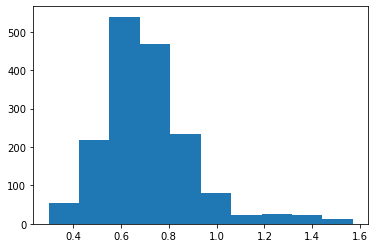

In [171]:
plt.hist(threshs)

In [172]:
sum(threshs)/(len(threshs))

0.715091254579879

In [160]:
max(threshs)

1.6332252

In [177]:
for t, path in zip(threshs, paths):
    if t > 1:
        print(path, t)

../data/lfw/Adam_Scott 1.0890274
../data/lfw/Aldo_Paredes 1.3112315
../data/lfw/Amanda_Beard 1.2487646
../data/lfw/Betsy_Smith 1.31778
../data/lfw/Bono 1.0217701
../data/lfw/Camilla_Parker_Bowles 1.3229097
../data/lfw/Charles_Grassley 1.2965376
../data/lfw/Charles_Schumer 1.3065991
../data/lfw/Courtney_Love 1.089797
../data/lfw/Cristina_Fernandez 1.3436574
../data/lfw/Dan_Wheldon 1.3849032
../data/lfw/David_Spade 1.0209419
../data/lfw/Demetrius_Ferraciu 1.0484273
../data/lfw/Denise_Johnson 1.3899608
../data/lfw/Diane_Green 1.1268531
../data/lfw/Dorthy_Moxley 1.427808
../data/lfw/Doug_Duncan 1.3042632
../data/lfw/Elisabeth_Schumacher 1.3068652
../data/lfw/Ellen_DeGeneres 1.356952
../data/lfw/Emily_Robison 1.300625
../data/lfw/Eric_Hinske 1.3150128
../data/lfw/Frances_Fisher 1.5551342
../data/lfw/Franco_Dragone 1.4312943
../data/lfw/Gerard_Depardieu 1.4139193
../data/lfw/Gwendal_Peizerat 1.3411183
../data/lfw/Ishaq_Shahryar 1.3029618
../data/lfw/Janica_Kostelic 1.0405484
../data/lfw/Jess

In [154]:
def crop_display(path):
    img = Image.open(path)
    boxes, probs, points = mtcnn.detect(img, landmarks=True)
    img_draw = img.copy()
    draw = ImageDraw.Draw(img_draw)
    for box in boxes:
        draw.rectangle(box, outline=(255, 0, 0), width=6)
        break
    plt.imshow(img_draw)

[156.62085 163.17241 266.06995 316.60544]


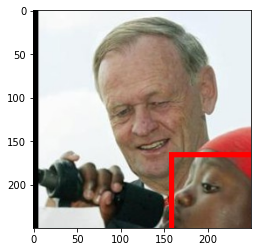

In [162]:
crop_display('../data/lfw/Jean_Chretien/Jean_Chretien_0001.jpg')

In [8]:
D = {}
for file in os.listdir('uncropped/'):
    path = 'uncropped/' + file
    D[file] = img_to_encoding(path)

In [6]:
key = 'front.jpg'
for file in D:
    print(file, D[file].shape)


front.jpg torch.Size([1, 512])
parents.jpg torch.Size([2, 512])
scooter.jpg torch.Size([1, 512])
side.jpg torch.Size([1, 512])


In [6]:
img_embedding.shape

torch.Size([6, 512])

In [13]:
boxes, probs, points = mtcnn.detect(img, landmarks=True)
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
for i, (box, point) in enumerate(zip(boxes, points)):
    for box in boxes:
        draw.rectangle(box, outline=(255, 0, 0), width=6)

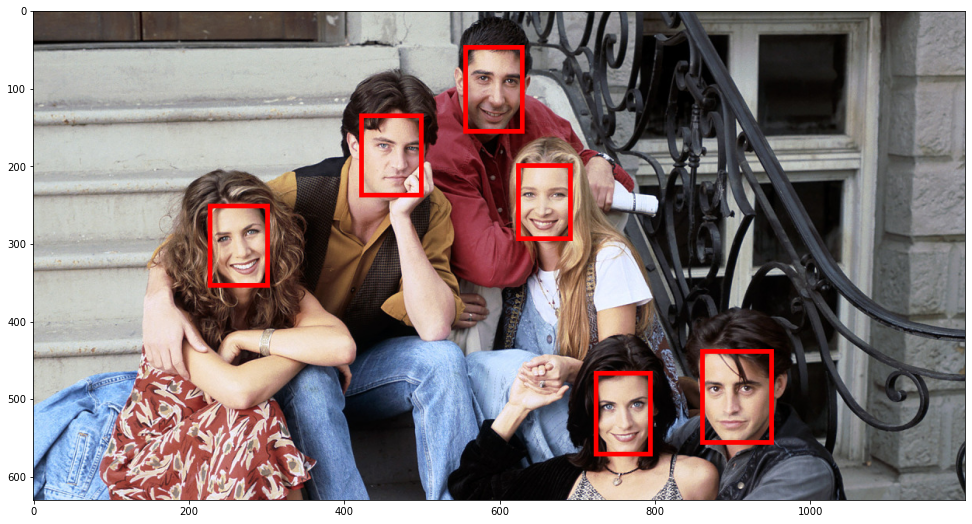

In [14]:
plt.figure(figsize=(18,9))
plt.imshow(img_draw)

In [15]:
box

array([622.1824 , 197.50801, 694.8333 , 296.76474], dtype=float32)